In [8]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [9]:
DIR_PATH = 'C:/programmering/DTU/robobot/data/images'
files = os.listdir(DIR_PATH)

images = [cv2.imread(os.path.join(DIR_PATH, f)) for f in files]
# images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

True


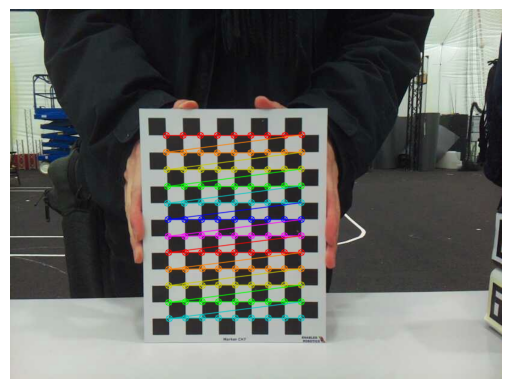

True


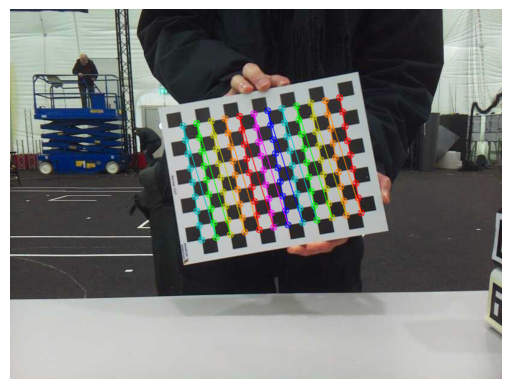

True


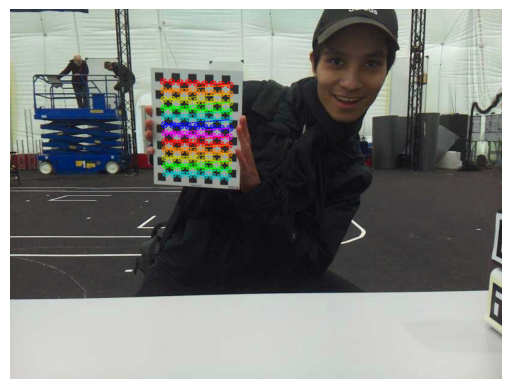

True


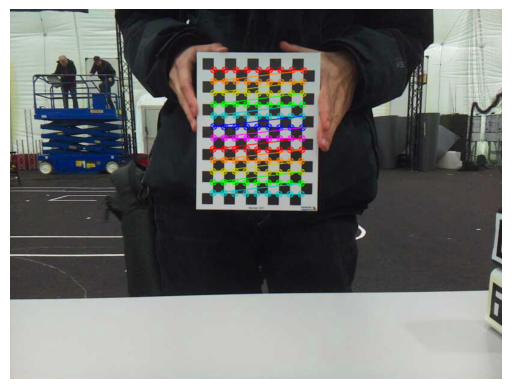

True


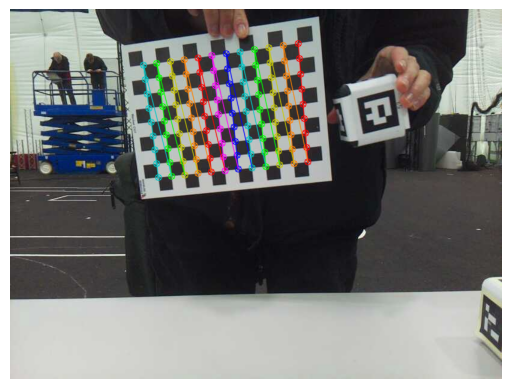

True


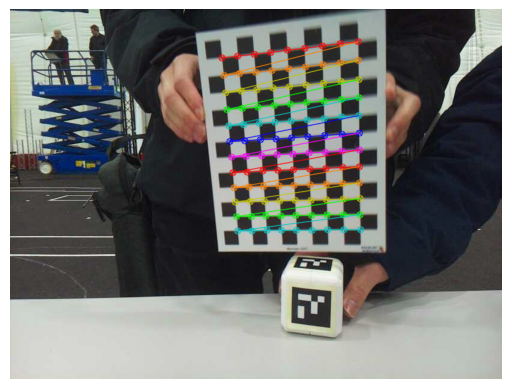

True


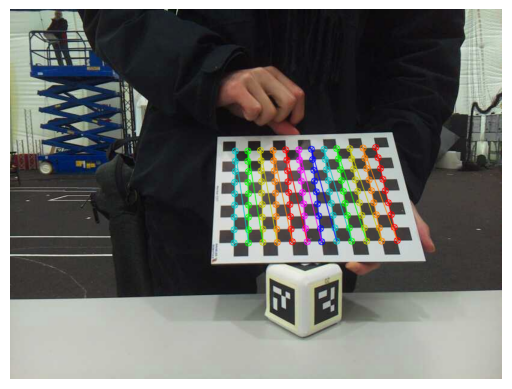

True


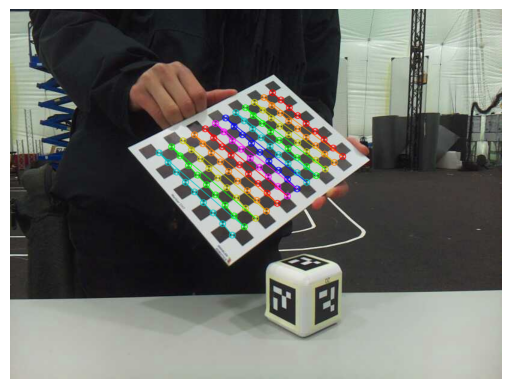

In [ ]:
cell_width = 150 #mm

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, cell_width, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((9*12,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:12].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 
 
for i, img in enumerate(images):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,12), None)
 
    # If found, add object points, image points (after refining them)
    
    print(ret)
    if ret == True:
        objpoints.append(objp)
 
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
 
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,12), corners2, ret)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        print(f'Chessboard not found in {files[i]}')
 
cv2.destroyAllWindows()

In [11]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


In [12]:
img = images[0]
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [13]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
 
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png', dst)

True

In [14]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
 
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.011592654761091586
